In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Contagem de Sobrevivência:
Survived
0    549
1    342
Name: count, dtype: int64


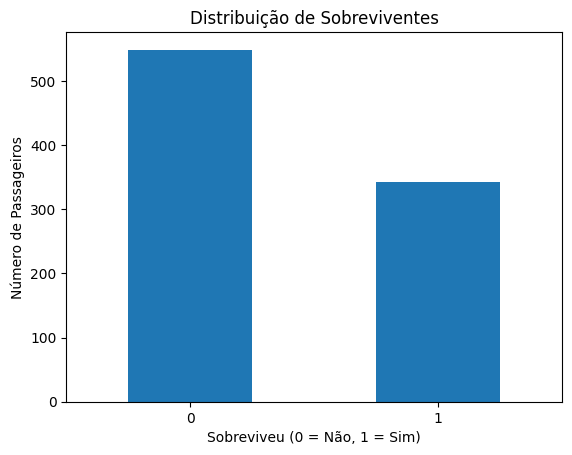

In [ ]:
import matplotlib.pyplot as plt

contagem_sobrevivencia = df['Survived'].value_counts()
print("Contagem de Sobrevivência:")
print(contagem_sobrevivencia)

contagem_sobrevivencia.plot(kind='bar', title='Distribuição de Sobreviventes')

plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0) 
plt.show() 

Tabela de Sobrevivência por Sexo:
Survived    0    1
Sex               
female     81  233
male      468  109


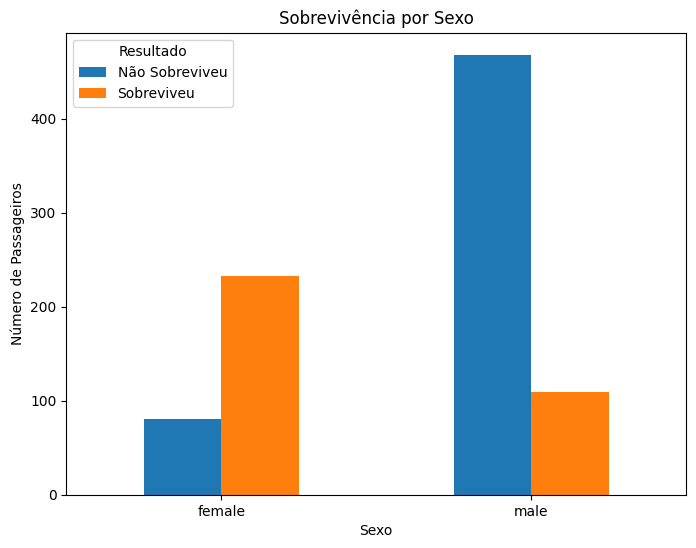

In [ ]:
tabela_sexo_sobrevivencia = pd.crosstab(df['Sex'], df['Survived'])

print("Tabela de Sobrevivência por Sexo:")
print(tabela_sexo_sobrevivencia)

legenda = {0: 'Não Sobreviveu', 1: 'Sobreviveu'}

tabela_sexo_sobrevivencia.plot(kind='bar', figsize=(8, 6))

plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)
plt.legend(title='Resultado', labels=[legenda[0], legenda[1]])
plt.show()

Tabela de Sobrevivência por Classe:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


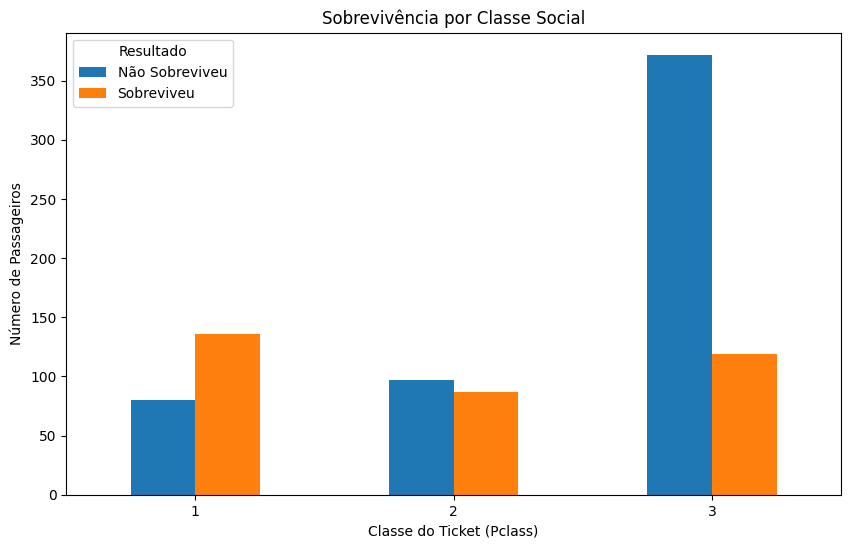

In [ ]:
tabela_classe_sobrevivencia = pd.crosstab(df['Pclass'], df['Survived'])

print("Tabela de Sobrevivência por Classe:")
print(tabela_classe_sobrevivencia)

legenda = {0: 'Não Sobreviveu', 1: 'Sobreviveu'}

tabela_classe_sobrevivencia.plot(kind='bar', figsize=(10, 6))

plt.title('Sobrevivência por Classe Social')
plt.xlabel('Classe do Ticket (Pclass)')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)
plt.legend(title='Resultado', labels=[legenda[0], legenda[1]])
plt.show()

In [ ]:
print("Valores originais da coluna 'Sex':")
print(df['Sex'].head())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print("\nValores transformados da coluna 'Sex':")
print(df['Sex'].head())

Valores originais da coluna 'Sex':
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Valores transformados da coluna 'Sex':
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [ ]:
mediana_idade = df['Age'].median()
print(f"A idade mediana dos passageiros é: {mediana_idade} anos")

df['Age'].fillna(mediana_idade, inplace=True)

valores_nulos_idade = df['Age'].isnull().sum()
print(f"\nNúmero de valores nulos em 'Age' após o tratamento: {valores_nulos_idade}")

A idade mediana dos passageiros é: 28.0 anos

Número de valores nulos em 'Age' após o tratamento: 0


C:\Users\patri\AppData\Local\Temp\ipykernel_20044\1645565532.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mediana_idade, inplace=True)


In [ ]:
df.drop('Cabin', axis=1, inplace=True)
print("Coluna 'Cabin' removida com sucesso.")

moda_embarque = df['Embarked'].mode()[0]
print(f"O porto de embarque mais comum é: {moda_embarque}")

df['Embarked'].fillna(moda_embarque, inplace=True)
print("Valores faltantes em 'Embarked' preenchidos com sucesso.")

print("\n--- Verificação Final ---")
df.info()

Coluna 'Cabin' removida com sucesso.
O porto de embarque mais comum é: S
Valores faltantes em 'Embarked' preenchidos com sucesso.

--- Verificação Final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


C:\Users\patri\AppData\Local\Temp\ipykernel_20044\1012583800.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(moda_embarque, inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

colunas_para_remover = ['PassengerId', 'Name', 'Ticket']

df.drop(columns=colunas_para_remover, inplace=True)

print("--- Tabela Final Pronta Para o Modelo ---")
print(df.head())

print("\n--- Informações Finais da Tabela ---")
df.info()

--- Tabela Final Pronta Para o Modelo ---
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True

--- Informações Finais da Tabela ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891